# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# TUTORIAL

## Importing libraries

In [70]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/TC1002S_A01068505"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [72]:
# Dataset url
url = Ruta + "/datasets/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


## Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [73]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [74]:
# get the number of observations and variables
df.shape


(1024, 6)

2. Drop rows with any missing values


In [75]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(1024, 6)


3. Scatterplot




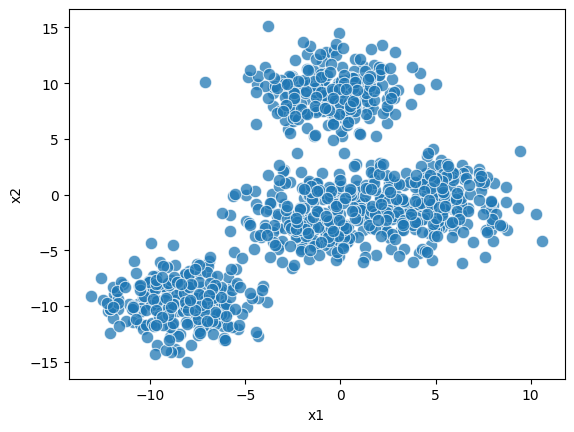

In [76]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="x1", y="x2", s=80, alpha=0.75)
plt.show()

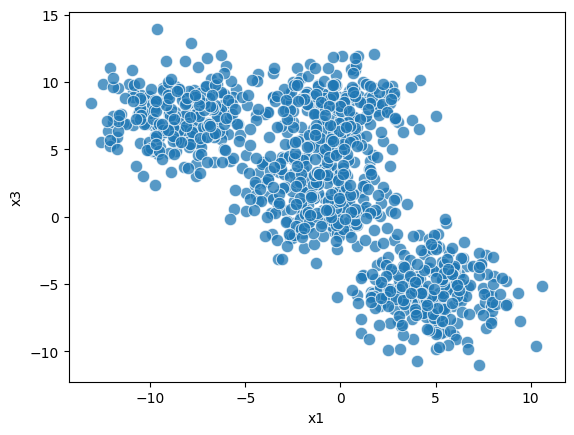

In [77]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="x1", y="x3", s=80, alpha=0.75)
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

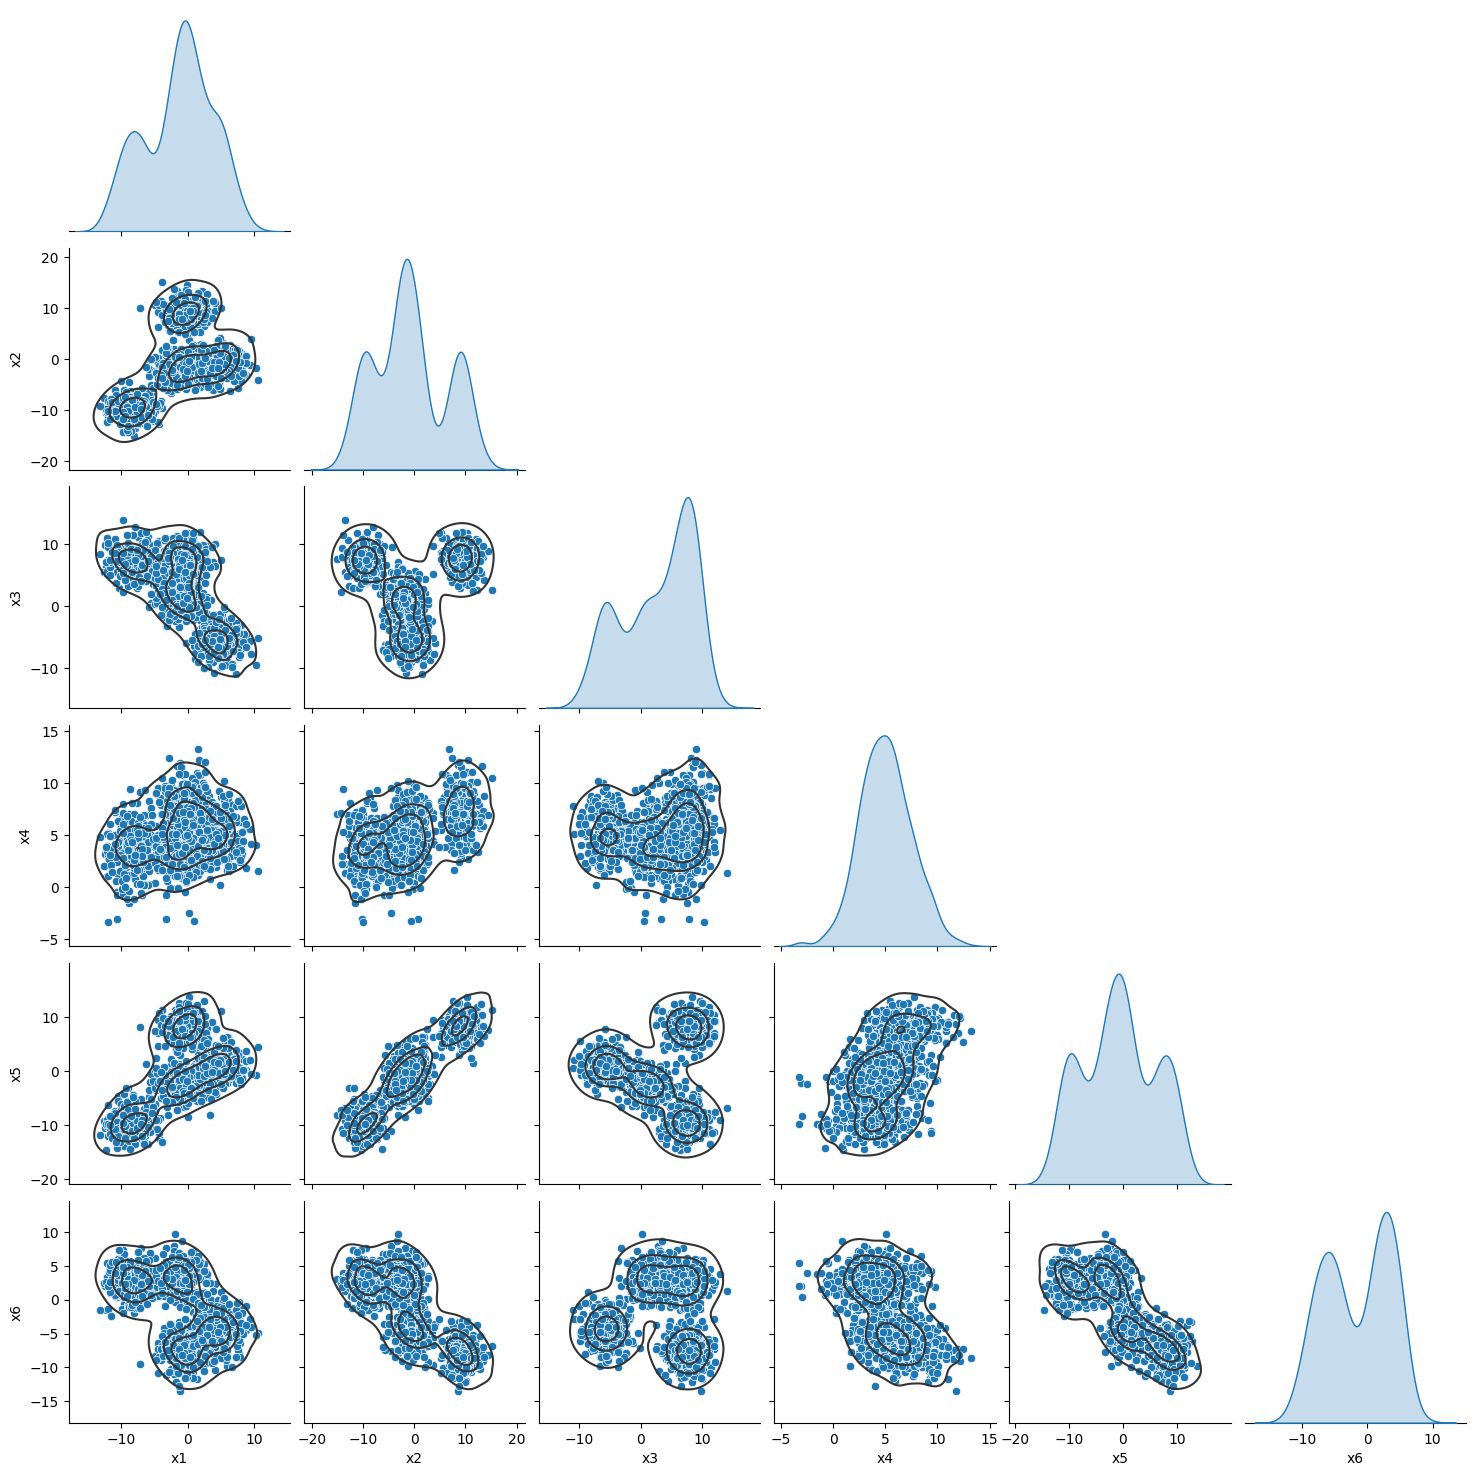

In [78]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

## Kmeans clustering

Kmeans clustering

In [79]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df)
#yestimated = km.fit_predict(df[['x1','x2']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

array([1, 2, 2, ..., 2, 1, 1], dtype=int32)

In [80]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,1
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,1
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,0
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,2
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,1


In [81]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([1, 2, 0], dtype=int32)

In [82]:
# Cluster centroides
km.cluster_centers_


array([[-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451],
       [ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ]])

In [83]:
# Sum of squared error (sse) of the final model
km.inertia_

44295.1263266536

In [84]:
# The number of iterations required to converge
km.n_iter_

2

## <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

## Compute the number of points in each cluster

In [85]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 259
Number of points in clusters 1: 509
Number of points in clusters 02: 256
Total Number of points in the clusters: 1024


## Plot estimated clusters

Plot estimated clusters

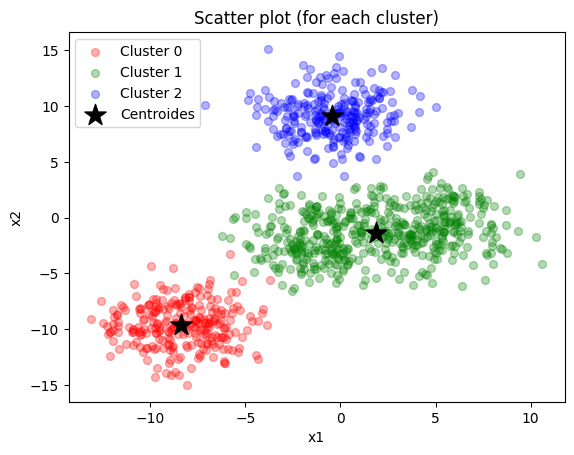

In [86]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [87]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)


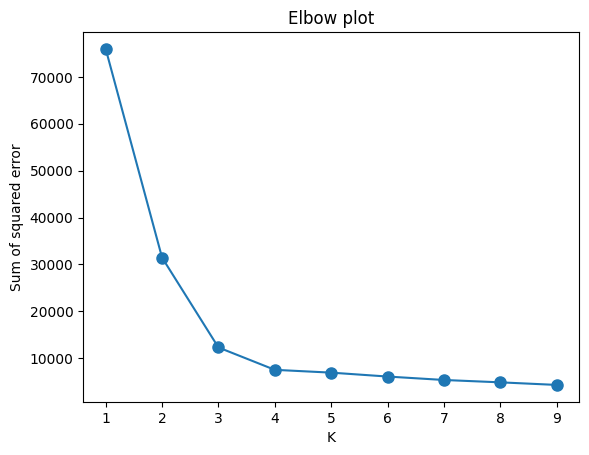

In [88]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



## Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

## Activity:

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


## *IMPORTS*

### Importing libraries

In [169]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/TC1002S_A01068505"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

### Importing data

In [364]:
# Dataset url
url = Ruta + "/datasets/iris/iris.csv"

# Load the dataset
df_iris  = pd.read_csv(url)

df_iris = df_iris.rename(columns={"sepal length (cm)": "sl"})
df_iris = df_iris.rename(columns={"sepal width (cm)": "sw"})
df_iris = df_iris.rename(columns={"petal length (cm)": "pl"})
df_iris = df_iris.rename(columns={"petal width (cm)": "pw"})

df_iris.drop("Class", axis=1, inplace = True)

df_iris

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Understanding and preprocessing the data


In [171]:
# Print the dataframe
df_iris

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [172]:
# get the number of observations and variables
df_iris.shape


(150, 4)

In [173]:
# Drop rows with NaN values if existing
df_iris.dropna()

# Print the new shape
print(df_iris.shape)

(150, 4)


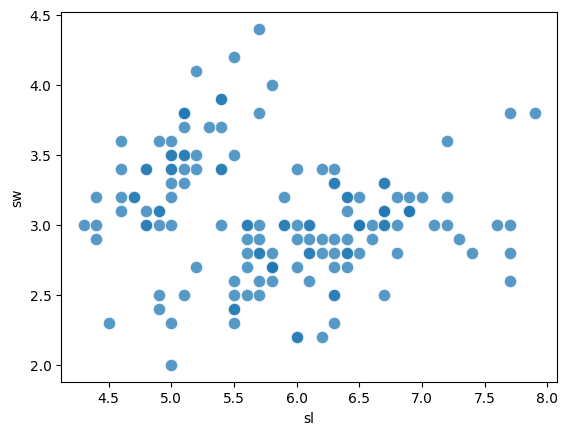

In [174]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df_iris, x="sl", y="sw", s=80, alpha=0.75)
plt.show()

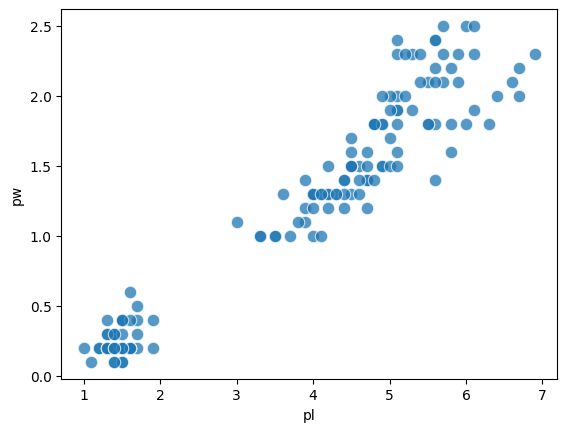

In [175]:
# Scatterplot of x3 and x4
sns.scatterplot(data=df_iris, x="pl", y="pw", s=80, alpha=0.75)
plt.show()

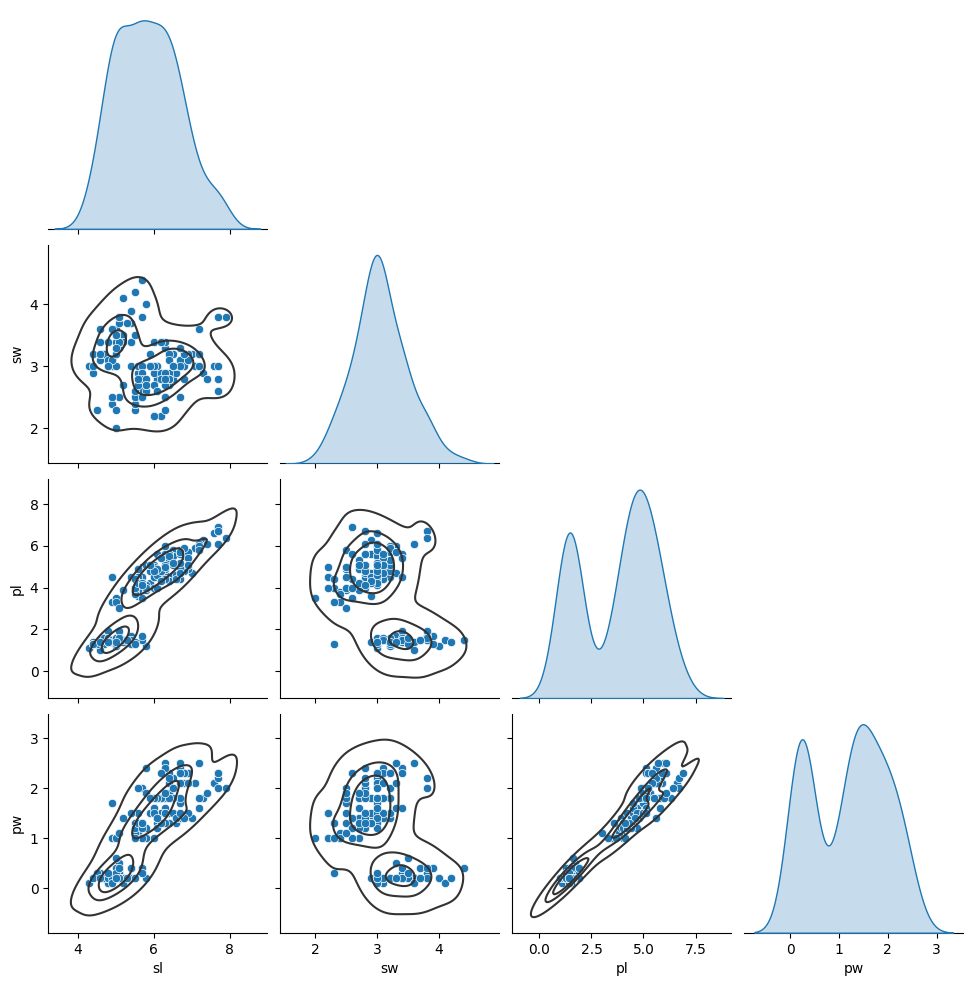

In [176]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df_iris, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

Parace que se encuentran 2 grupos/clusters, sin embargo, se conoce que se tratan de 3 tipos distintos de iris, por lo que tomaremos como objetivo este último.

## 1. Do clustering with the iris flower dataset to form clusters using as features the four features

### Kmeans clustering

In [185]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Determinado gracias a las gráficas y reflexión realizado en el apartado "Undertanding and preprocessing the data"

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df_iris)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [186]:
# Add a new column to the dataset with the cluster information
df_iris['yestimated'] = yestimated

df_iris

,sl,sw,pl,pw,yestimated
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [187]:
# Print the Labels/Names of the existing clusters
df_iris.yestimated.unique()

array([0, 1, 2], dtype=int32)

In [188]:
# Cluster centroides
km.cluster_centers_


array([[5.00600000e+00, 3.42800000e+00, 1.46200000e+00, 2.46000000e-01,
        6.66133815e-16],
       [6.85384615e+00, 3.07692308e+00, 5.71538462e+00, 2.05384615e+00,
        1.00000000e+00],
       [5.88360656e+00, 2.74098361e+00, 4.38852459e+00, 1.43442623e+00,
        2.00000000e+00]])

In [189]:
# Sum of squared error (sse) of the final model
km.inertia_

78.85566582597731

In [190]:
# The number of iterations required to converge
km.n_iter_

2

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

### Compute the number of points in each cluster

In [191]:
# Get a dataframe with the data of each clsuter
df_iris0 = df_iris[df_iris.yestimated==0]
df_iris1 = df_iris[df_iris.yestimated==1]
df_iris2 = df_iris[df_iris.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df_iris0.shape[0]
NpointsCluster1 = df_iris1.shape[0]
NpointsCluster2 = df_iris2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 50
Number of points in clusters 1: 39
Number of points in clusters 02: 61
Total Number of points in the clusters: 150


### Plot estimated clusters

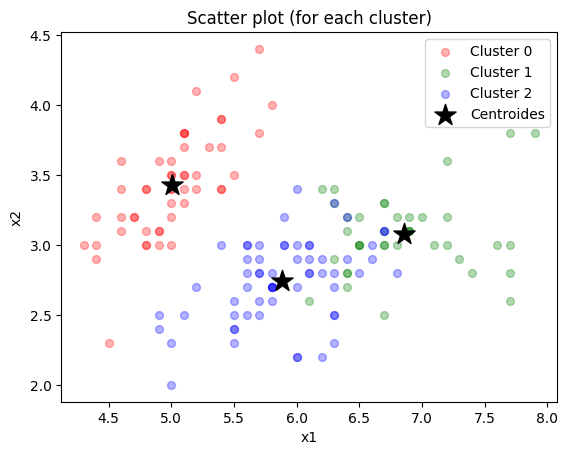

In [192]:
# Get a dataframe with the data of each clsuter
df_iris1 = df_iris[df_iris.yestimated==0]
df_iris2 = df_iris[df_iris.yestimated==1]
df_iris3 = df_iris[df_iris.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df_iris1.sl, df_iris1.sw, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris2.sl, df_iris2.sw, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris3.sl, df_iris3.sw, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Selecting K: elbow plot

In [193]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df_iris)
    # Save sse for each k
    sse.append(km.inertia_)


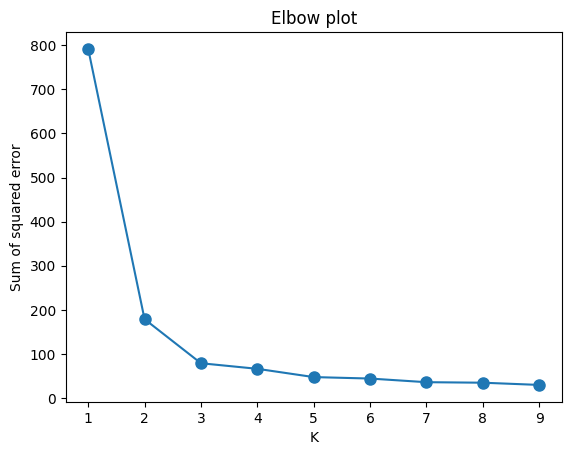

In [194]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### <span style='color:Blue'> **Important remarks**  </span>

- Observaciones:

Como se puede observar en la última gráfica realizada, el punto de infleción en donde el valor de la suma de error cuadrático comienza a cambiar de menos en menos, es el valor K = 3, lo que nos deja una pequeña confirmación de haber elegido el valor más óptimo para la creación de los grupos de datos.

Asimismo, la gráfica mostrada en el "plot" de los clusters estimados, nos deja ver una distribución adecuada de los centroides, lo que termina por albergar a todos los datos de manera proporcionada, en sus respectivos grupos.



## 2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

### \*Drop\*

In [247]:
df_iris.drop("sl", axis=1, inplace = True)
df_iris.drop("sw", axis=1, inplace = True)

df_iris

,pl,pw
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Kmeans clustering

In [248]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Determinado gracias a las gráficas y reflexión realizado en el apartado "Undertanding and preprocessing the data"

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df_iris[['pl','pw']] )

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [249]:
# Add a new column to the dataset with the cluster information
df_iris['yestimated'] = yestimated

df_iris

,pl,pw,yestimated
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [250]:
# Print the Labels/Names of the existing clusters
df_iris.yestimated.unique()

array([1, 2, 0], dtype=int32)

In [251]:
# Cluster centroides
km.cluster_centers_


array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [252]:
# Sum of squared error (sse) of the final model
km.inertia_

31.37135897435897

In [253]:
# The number of iterations required to converge
km.n_iter_

7

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

### Compute the number of points in each cluster

In [254]:
# Get a dataframe with the data of each clsuter
df_iris0 = df_iris[df_iris.yestimated==0]
df_iris1 = df_iris[df_iris.yestimated==1]
df_iris2 = df_iris[df_iris.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df_iris0.shape[0]
NpointsCluster1 = df_iris1.shape[0]
NpointsCluster2 = df_iris2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 48
Number of points in clusters 1: 50
Number of points in clusters 2: 52
Total Number of points in the clusters: 150


### Plot estimated clusters

Plot estimated clusters

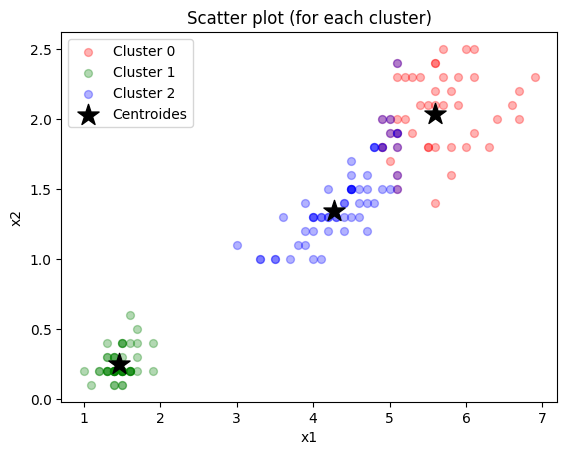

In [255]:
# Get a dataframe with the data of each clsuter
df_iris1 = df_iris[df_iris.yestimated==0]
df_iris2 = df_iris[df_iris.yestimated==1]
# df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df_iris1.pl, df_iris1.pw, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris2.pl, df_iris2.pw, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris3.pl, df_iris3.pw, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [256]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df_iris[['pl','pw']])
    # Save sse for each k
    sse.append(km.inertia_)


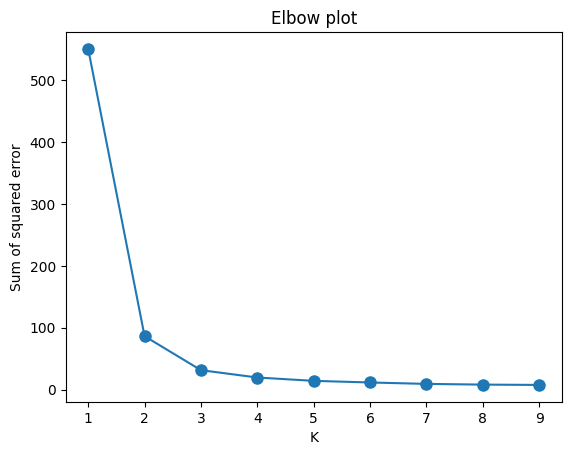

In [257]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


### <span style='color:Blue'> **Important remarks**  </span>

- Observaciones:

Así como en el inciso anterior, se puede observar en "K: elbow plot" que punto de infleción en donde el valor de la suma de error cuadrático comienza a cambiar de menos en menos, sigue manteniendose como K = 3, por ahora aún el valor más óptimo para la creación de los grupos de datos.

Asimismo, nuevamente, la gráfica mostrada en el "plot" de los clusters estimados, nos deja ver una distribución adecuada de los centroides, lo que termina por albergar a todos los datos de manera proporcionada, en sus respectivos grupos.

## 3. (1) Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features {K = 3}

### \*Drop\*

In [344]:
df_iris.drop("pl", axis=1, inplace = True)
df_iris.drop("pw", axis=1, inplace = True)

df_iris

,sl,sw
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Kmeans clustering

In [354]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Determinado gracias a las gráficas y reflexión realizado en el apartado "Undertanding and preprocessing the data"

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df_iris[['sl','sw']] )

# Print estimated cluster of each point in the dataset
yestimated

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [355]:
# Add a new column to the dataset with the cluster information
df_iris['yestimated'] = yestimated

df_iris

,sl,sw,yestimated
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


In [356]:
# Print the Labels/Names of the existing clusters
df_iris.yestimated.unique()

array([2, 1, 0], dtype=int32)

In [357]:
# Cluster centroides
km.cluster_centers_


array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [358]:
# Sum of squared error (sse) of the final model
km.inertia_

37.05070212765956

In [359]:
# The number of iterations required to converge
km.n_iter_

4

### <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

### Compute the number of points in each cluster

In [360]:
# Get a dataframe with the data of each clsuter
df_iris0 = df_iris[df_iris.yestimated==0]
df_iris1 = df_iris[df_iris.yestimated==1]
df_iris2 = df_iris[df_iris.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df_iris0.shape[0]
NpointsCluster1 = df_iris1.shape[0]
NpointsCluster2 = df_iris2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 53
Number of points in clusters 1: 47
Number of points in clusters 2: 50
Total Number of points in the clusters: 150


### Plot estimated clusters

Plot estimated clusters

<ipython-input-361-95d34038d5b5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iris3 = df_iris[df.yestimated==2]


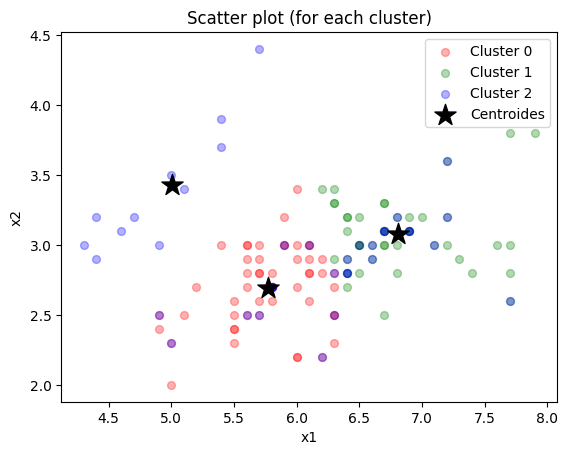

In [361]:
# Get a dataframe with the data of each clsuter
df_iris1 = df_iris[df_iris.yestimated==0]
df_iris2 = df_iris[df_iris.yestimated==1]
df_iris3 = df_iris[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df_iris1.sl, df_iris1.sw, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris2.sl, df_iris2.sw, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris3.sl, df_iris3.sw, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [362]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df_iris[['sl','sw']])
    # Save sse for each k
    sse.append(km.inertia_)


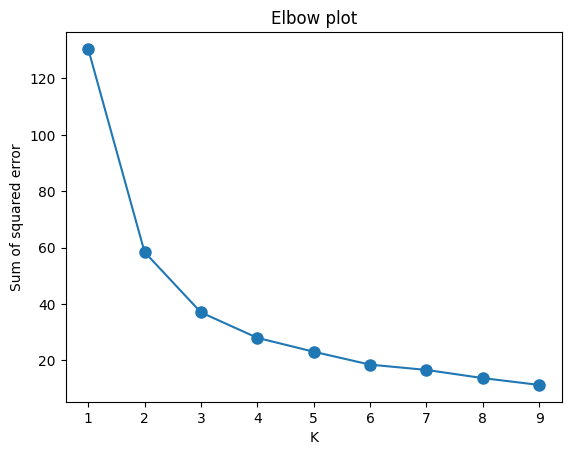

In [363]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


### <span style='color:Blue'> **Important remarks**  </span>

- Observaciones:

Para este último inciso, se nos presenta un caso distinto a los anteriores, en el cual, podemos observar que, aunque el valor 3 sigue representando un punto de inflexión, aquel que más fuerte desciende en la gráfica ahora pasa a ser el valor de K = 5. Esto por parte de la gráfica de "K: elbow plot".

Por el otro lado, en el plot de la estimación de clusters, se puede observar que los datos se encuentran más dispersos de sus respectivos centroides que en casos anteriores, a pesar de conservar una forma adecuada.

Es gracias a esto, que se volverá a realizar este 3er inciso, ahora con K = 5, para verificar el que se pueda distribuir de mejor forma la información presentada de los 'Sépalos'.


## 3. (2) Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features {K = 5}

### \*Drop\*

In [365]:
df_iris.drop("pl", axis=1, inplace = True)
df_iris.drop("pw", axis=1, inplace = True)

df_iris

,sl,sw
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Kmeans clustering

In [366]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K = 5

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df_iris[['sl','sw']] )

# Print estimated cluster of each point in the dataset
yestimated

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 0, 3, 0, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 0,
       1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 3, 3, 0, 4, 0, 3, 0,
       3, 3, 0, 1, 1, 3, 3, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 3], dtype=int32)

In [367]:
# Add a new column to the dataset with the cluster information
df_iris['yestimated'] = yestimated

df_iris

,sl,sw,yestimated
0,5.1,3.5,2
1,4.9,3.0,4
2,4.7,3.2,4
3,4.6,3.1,4
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,3
147,6.5,3.0,3
148,6.2,3.4,3


In [368]:
# Print the Labels/Names of the existing clusters
df_iris.yestimated.unique()

array([2, 4, 0, 3, 1], dtype=int32)

In [369]:
# Cluster centroides
km.cluster_centers_


array([[7.0962963 , 3.11481481],
       [5.57096774, 2.61935484],
       [5.24285714, 3.66785714],
       [6.26829268, 2.91219512],
       [4.71304348, 3.09565217]])

In [370]:
# Sum of squared error (sse) of the final model
km.inertia_

21.533939726105004

In [371]:
# The number of iterations required to converge
km.n_iter_

6

### <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

### Compute the number of points in each cluster

In [372]:
# Get a dataframe with the data of each clsuter
df_iris0 = df_iris[df_iris.yestimated==0]
df_iris1 = df_iris[df_iris.yestimated==1]
df_iris2 = df_iris[df_iris.yestimated==2]
df_iris3 = df_iris[df_iris.yestimated==3]
df_iris4 = df_iris[df_iris.yestimated==4]

# Number of points in cluster 0
NpointsCluster0 = df_iris0.shape[0]
NpointsCluster1 = df_iris1.shape[0]
NpointsCluster2 = df_iris2.shape[0]
NpointsCluster3 = df_iris3.shape[0]
NpointsCluster4 = df_iris4.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )
print("Number of points in clusters 3: " + str(NpointsCluster3) )
print("Number of points in clusters 4: " + str(NpointsCluster4) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2+NpointsCluster3+NpointsCluster4) )

Number of points in clusters 0: 27
Number of points in clusters 1: 31
Number of points in clusters 2: 28
Number of points in clusters 3: 41
Number of points in clusters 4: 23
Total Number of points in the clusters: 150


### Plot estimated clusters

Plot estimated clusters

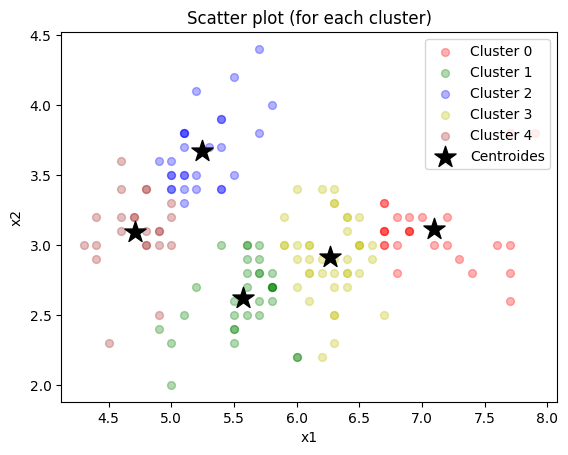

In [379]:
# Get a dataframe with the data of each clsuter
df_iris1 = df_iris[df_iris.yestimated==0]
df_iris2 = df_iris[df_iris.yestimated==1]
df_iris3 = df_iris[df_iris.yestimated==2]
df_iris4 = df_iris[df_iris.yestimated==3]
df_iris5 = df_iris[df_iris.yestimated==4]

# Scatter plot of each cluster
plt.scatter(df_iris1.sl, df_iris1.sw, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris2.sl, df_iris2.sw, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris3.sl, df_iris3.sw, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris4.sl, df_iris4.sw, label='Cluster 3', c='y', marker='o', s=32, alpha=0.3)
plt.scatter(df_iris5.sl, df_iris5.sw, label='Cluster 4', c='brown', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [380]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df_iris[['sl','sw']])
    # Save sse for each k
    sse.append(km.inertia_)


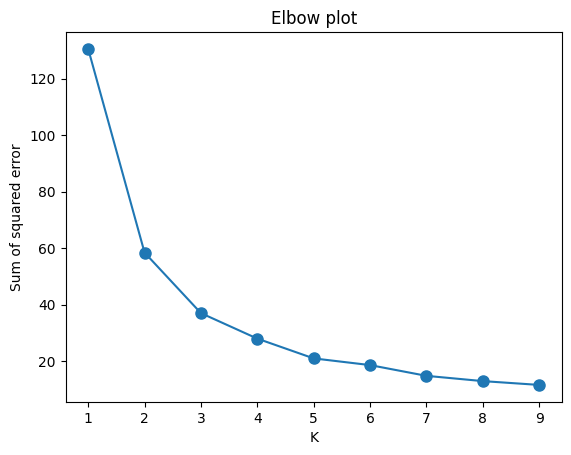

In [381]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


### <span style='color:Blue'> **Important remarks**  </span>

- Observaciones:

Se puede apreciar la diferencia existente entre la primera iterción del presente inciso y la segunda, en donde en esta última se observa una mejor proporcion de distribución de los datos por cada centroide, en el plot de estimación de clusters.


## 4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

A lo largo de la actividad se realizaron cuatro agrupamientos en total tomando dos valores distintos para K; esto principalmente por el caso del inciso tres, en donde el momento de inflexión de la gráfica de 'sse' se presentó más adelante en el recorrido.

Entonces, nos topamos con los valores de K siendo 3 y 5, creando esa cantidad de clusters respectivamente. Si vemos el caso desde el punto de vista de la optimización de recursos, como de procesamiento o de memoria, el hecho de que se haga en menor número de clusters representa un ahorro en estos aspectos.

Por el otro lado, y hablando específicamente del caso en donde fue estrictamente necesario (3er inciso), el hecho de contar con más clusters puede llevar a una mejor clasificación de los datos, dado que se llega a una mejor distribución en los distintos centroides, en la cual no llega a haber datos remotos o muy alejados.

Sin embargo, por el tiempo que llevamos trabajando esta base de datos, sabemos que en escencia existen tres grupos categóricos inhertes a la información dada, representando los distintos tipos de la flor iris analizados. Por lo cual, lo más lógico sería seguir manteniendo esta división de grupos, lo cual se logró para los primeros incisos; aunque como ya se habiá mencionado y se vio en el desarrollo, no fue el resultado más adecuado para el 3ro.

Por lo que, en conclusión, es mejor evaluar cada caso por individual para determinar cuál es la mejor manera de proceder; ahora bien, para el presente caso que trata de la misma base de datos analizada desde distintos puntos de vista, considero personalmente que es mejor como se mostró en el 1er inciso, donde se tomaban en cuenta todos los datos de la base, no posee el costo de procesamiento por las iteraciones del 2do inciso, y se logró agrupar en los ya previstos 3 grupos con K = 3, a diferencia del 3ro.

# Made by: Sergio Eduardo Gutiérrez Torres | A01068505